# Convolution

In [2]:
from myst_nb import glue

## Definition

Many image processing methods result from a modification of one pixel with respect to its neighbors.
When this modification is similar in the entire image $g$,
it can be mathematically defined using a second image $h$ which defines the neighbor relationships.
This results in a third image $f$.
This is the so-called convolution {ref}`[Jahne 2005, section 4] <C:biblio>` and it is denoted with $*$:

$$
  f(x,y) = (g*h)(x,y) = \sum_m \sum_n g(x-m,y-n) h(m,n)
$$

Intuitively, the convolution "spreads" each pixel $(m,n)$ in $g$ following $h$ and proportionally to the intensity $g_{m,n}$.
{numref}`F:convolution:sketch` gives an example of the computing of a particular pixel.

```{figure} figs/convolution.png
---
scale: 70%
name: F:convolution:sketch
---
Example for computing the pixel (2,2) of $f$.
```

For the sake of simplicity, the image $h$ is:
* of odd size ($3\times3$, $5\times5$, $7\times7$...);
* centered, _i.e._ the pixel with coordinates $(0,0)$ is at the center of the image $h$.

Furthermore, the image $h$ has different names, depending on the context: _filter_, _mask_, _kernel_, _window_, _pattern_ or _point spread function_ (PSF).

Some convolution examples are shown in {numref}`F:convolution:example`.

```{glue:figure} G:convolution:example
:name: "F:convolution:example"

Three examples of image convolution.
```

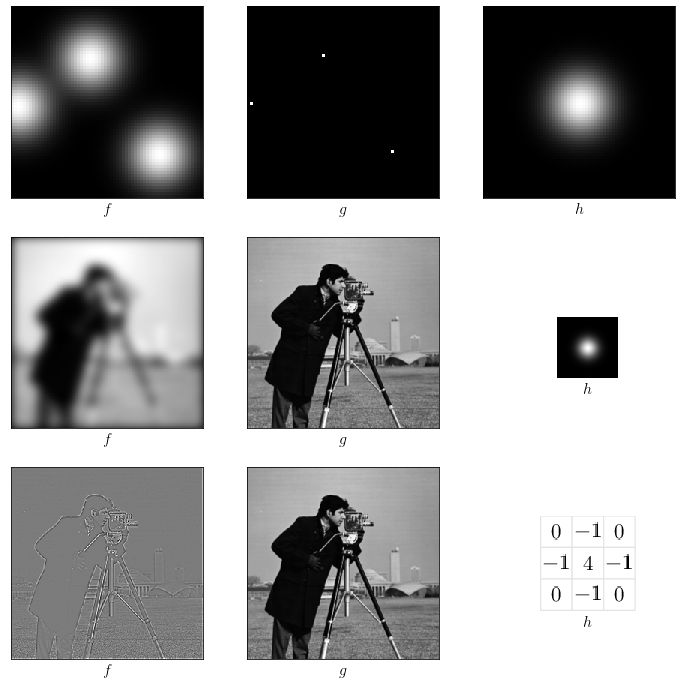

In [6]:
# Examples of image convolution

from numpy import zeros
from matplotlib.pyplot import figure, close, imshow, subplot, text, xlabel, box
from scipy.ndimage import gaussian_filter
from scipy.signal import convolve2d
from skimage import data
from skimage.io import imread
from skimage.transform import resize
import matplotlib
matplotlib.rcParams['text.usetex'] = True

def diracs_gauss():
    # 3 Diracs & Gaussian
    
    g = zeros((64,64))
    g[32,  1] = 1
    g[16, 25] = 1
    g[48, 48] = 1
    
    sigma = 7
    d = zeros((64,64))
    d[32, 32] = 1
    h = gaussian_filter(d, sigma=sigma)
    
    f = convolve2d(g, h, mode='same')
    
    return f, g, h

def blurred_cameraman():
    # Blurred cameraman

    g = data.camera()
    g = resize(g, (256, 256))
    
    sigma = 7
    d = zeros((64,64))
    d[32, 32] = 1
    h = gaussian_filter(d, sigma=sigma)

    f = convolve2d(g, h, mode='same')
    
    return f, g, h

def highpass_cameraman():
    # Highpass + cameraman

    g = data.camera()
    g = resize(g, (256, 256))

    h = [[0, -1, 0], [-1, 4, -1], [0, -1, 0]]
    
    f = convolve2d(g, h, mode='same')
    
    return f, g, h

def image(img, X, Y, i, name):
    # Show image with correct labels
    ax = subplot(X, Y, i)
    imshow(img, cmap="gray")
    xlabel("$"+name+"$", fontsize=16)
    ax.set_xticks([])
    ax.set_yticks([])
    
    
# Affichage
N = 3 # Nombre d'images
fig = figure(figsize=(12, 4*N))

i = 0
f, g, h = diracs_gauss()
image(f, N, 3, i+1, "f")
image(g, N, 3, i+2, "g")
image(h, N, 3, i+3, "h")

i = i+3
f, g, h = blurred_cameraman()
image(f, N, 3, i+1, "f")
image(g, N, 3, i+2, "g")
ax = fig.add_axes([.76, .45, .07, .07])
imshow(h, cmap="gray")
xlabel("$h$", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
box(False)

i = i+3
f, g, h = highpass_cameraman()
image(f, N, 3, i+1, "f")
image(g, N, 3, i+2, "g")
h = imread("figs/convolution-highpass.png")
#ax = fig.add_axes([.75, .19, .09, .09])
ax = fig.add_axes([.74, .18, .11, .11])
imshow(h)
xlabel("$h$", fontsize=16)
ax.set_xticks([])
ax.set_yticks([])
box(False)

glue("G:convolution:example", fig, display=False)

## Properties

* The neutral element of convolution is an image filled with zeros but the pixel at the center equals 1.

* The convolution is commutative: &nbsp;
$g*h = h*g$.

* The convolution is distributive with respect to the addition: &nbsp;
$g*(h_1+h_2) = g*h_1 + g*h_2$.

* The convolution is bilinear: &nbsp;
$\alpha (g*h) = (\alpha g) * h = g * (\alpha h)$ &nbsp; (with $\alpha\in\mathbb{C}$).

* The convolution is associative: &nbsp;
$h_1*(h_2*h_3) = (h_1*h_2)*h_3$.

## Boundaries effects

The convolution formula is not defined on the boundaries of the image:
as an example, computing $f_{1,1}$ in {numref}`F:convolution:sketch` requires the value of $g_{0,0}$ which is not defined.

Therefore, one has to assume some hypotheses of the pixel values oputside the image.
{numref}`F:convolution:boundaries-hypotheses` shows an image with some possibilities to consider the external pixels, and {numref}`F:convolution:boundaries-results` shows the convolution of the former images by a Gaussian.

```{glue:figure} G:convolution:boundaries-hypotheses
:name: "F:convolution:boundaries-hypotheses"

Several ways to set the pixels outside the image.
```

```{glue:figure} G:convolution:boundaries-results
:name: "F:convolution:boundaries-results"

Results of the convolution with the same image.
```

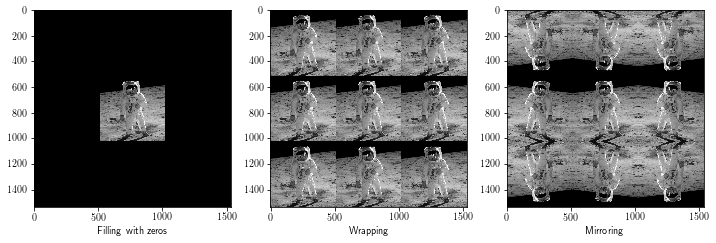

In [3]:
from matplotlib.pyplot import figure, subplot, imshow
from skimage.io import imread
from numpy import zeros

# Image to convolve
img = imread("figs/aldrin.png")
N = img.shape[0]

# Fill with 0
img_zeros = zeros((3*N, 3*N))
img_zeros[N:2*N, N:2*N] = img

# Wrap (periodic or circular condition)
img_wrap = zeros((3*N, 3*N))
for x in range(3):
    for y in range(3):
        img_wrap[x*N:(x+1)*N, y*N:(y+1)*N] = img

# Mirror (symmetrical condition)
img_symm = zeros((3*N, 3*N))
for x in range(3):
    for y in range(3):
        xdir = -1 if (x%2) == 0 else 1
        ydir = -1 if (y%2) == 0 else 1
        img_symm[x*N:(x+1)*N, y*N:(y+1)*N] = img[::xdir,::ydir]

# Display
fig = figure(figsize=(12,4))
subplot(1,3,1)
imshow(img_zeros, cmap="gray")
xlabel("Filling with zeros")
subplot(1,3,2)
imshow(img_wrap, cmap="gray")
xlabel("Wrapping")
subplot(1,3,3)
imshow(img_symm, cmap="gray")
xlabel("Mirroring")
glue("G:convolution:boundaries-hypotheses", fig, display=False)

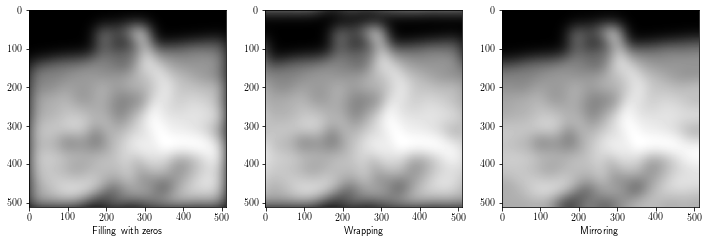

In [4]:
from scipy.signal import convolve2d
from skimage.filters import gaussian

# Convolution of the previous images by a Gaussian PSF
sigma = 20
img_zeros = gaussian(img, sigma=sigma, mode='constant', cval=0)
img_wrap = gaussian(img, sigma=sigma, mode='wrap')
img_symm = gaussian(img, sigma=sigma, mode='mirror')

# Display
fig = figure(figsize=(12,4))
subplot(1,3,1)
imshow(img_zeros, cmap="gray")
xlabel("Filling with zeros")
subplot(1,3,2)
imshow(img_wrap, cmap="gray")
xlabel("Wrapping")
subplot(1,3,3)
imshow(img_symm, cmap="gray")
xlabel("Mirroring")
glue("G:convolution:boundaries-results", fig, display=False)

One can see on the {numref}`F:convolution:boundaries-results` that the three convolutions are basically identical:
only the pixels near the boundaries may be different (darker or brighter on this example).
Anyway, there is no perfect choice to set the pixels outside the image, and each choice yields some errors.
Also, the best way is to arrange it so that the objects of interest are far from the edges.

At last, note that the wrapping hypothesis yields a _circular convolution_.
This is also the result given by a multiplication in the Fourier domain (see {ref}`C:fourier`).

## Separable Convolution

A separable convolution is when the convolution kernel $h$ can be written as the convolution of two 1D filters (say $h_1$ and $h_2$) defined along the two axes.
Let's give an example:

$$
  \underbrace{\begin{bmatrix}
    \alpha a & \alpha b & \alpha c \\
    \beta  a & \beta  b & \beta  c \\
    \gamma a & \gamma b & \gamma c \\
  \end{bmatrix}}_{h}
  =
  \underbrace{\begin{bmatrix}
    0 & \alpha & 0 \\
    0 & \beta & 0 \\
    0 & \gamma & 0 \\
  \end{bmatrix}}_{h_1}
  *
  \underbrace{\begin{bmatrix}
    0 & 0 & 0 \\
    a & b & c \\
    0 & 0 & 0 \\
    \end{bmatrix}}_{h_2}
  =
  \underbrace{\begin{bmatrix}
    \alpha \\
    \beta \\
    \gamma \\
  \end{bmatrix}}_{h_1}
  *
  \underbrace{\begin{bmatrix}
    a & b & c \\
    \end{bmatrix}}_{h_2}
$$

Thus, the convolution of an image $g$ by a separable filter $h$ can be calculated by first computing the convolution of $g$ with $h_1$, then the convolution of the former result with $h_2$ (or the reverse):

$$
  g * h = g * (h_1*h_2) = (g*h_1) * h_2 = (g*h_2) * h_1
$$

The convolution separability saves computation time because the computation of two 1D convolutions requires less operations than the computation of a 2D convolution.

In [5]:
# % Exemple pour des images $g$ et $h$ de taille $M \times N$~:
# %
# %    | multiplications | additions
# %
# %   Sans séparabilité :
# %   $f(x,y) = \sum_m \sum_n g(x-m,y-n) h(m,n)$ | $MN$      | $MN-1$
# %   Pour tous les pixels $x,y$~:               | $(MN)^2$  | $MN(MN-1)$
# % 
# %   Avec séparabilité :
# %   $f_1(x,y) = \sum_m g(x-m,y) h_1(m)$        | $M$       | $M-1$
# %   $f(x,y) = \sum_n f_1(x,y-n) h_2(n)$        | $N$       | $N-1$
# %   Pour tous les pixels $x,y$~:               | $MN(M+N)$ | $MN(M+N-2)$

In [6]:
# % \paragraph{Existe-t-il un opérateur inverse de la convolution~?}
# %
# % \begin{itemize}
# %   \item Ce problème est appelé déconvolution.
# %   \item Si la PSF est connue et vérifie certaines conditions très particulières (cf. analyse de Fourier)~: c'est possible~!
# %   \item En pratique, la quantification et le bruit rendent la déconvolution difficile.
# % \end{itemize}

# % Jähne, p.119
# % Cette question est importante car des dégradations comme le flou de bougé ou de mauvaise mise au point
# % peuvent être modélisées par une convolution.
# % Si un opérateur inverse existe et si la PSF est connue, alors il est possible de reconstruire l'image d'origine.
# % Le problème de l'inversion d'un filtre est appelé déconvolution ou filtrage inverse.
# % L'analyse de Fourier montrera que la reconstruction est possible pour des PSF très particulières.
# % Dans la pratique, la quantification et le bruit rendent la déconvolution encore plus difficile.